In [1]:
import pandas as pd

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from calendar import monthrange
import re

In [2]:
df_customers = pd.read_csv('https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/FUi5uSd6BfG_ig')

In [3]:
df_orders = pd.read_csv('https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/t9Li4JOfgxuUrg', parse_dates=['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_estimated_delivery_date', 'order_delivered_customer_date'])

In [4]:
df_order_items = pd.read_csv('https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/Gbt-yAcQrOe3Pw', parse_dates=['shipping_limit_date'])

Проведем небольшой анализ наших данных. Типы данных преобразовал сразу во время выгрузки через parse_date

In [5]:
tables = [df_customers, df_orders, df_order_items]
tables_n = ['df_customers', 'df_orders', 'df_order_items']
for name, i in zip(tables_n, tables): 
    print(f'{name}: rows - {i.shape[0]}, columns - {i.shape[1]}')

df_customers: rows - 99441, columns - 5
df_orders: rows - 99441, columns - 8
df_order_items: rows - 112650, columns - 7


Объединим данные в общую таблицу

In [6]:
df = df_customers.merge(df_orders, how='inner', on='customer_id')

In [7]:
df_1_2_3 = df.merge(df_order_items, how='left', on='order_id')

In [8]:
df_1_2_3.isna().sum()

customer_id                         0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_id                            0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 161
order_delivered_carrier_date     1968
order_delivered_customer_date    3229
order_estimated_delivery_date       0
order_item_id                     775
product_id                        775
seller_id                         775
shipping_limit_date               775
price                             775
freight_value                     775
dtype: int64

In [9]:
df_1_2_3.describe()

,customer_zip_code_prefix,order_item_id,price,freight_value
count,113425.000000,112650.000000,112650.000000,112650.000000
mean,35102.472965,1.197834,120.653739,19.990320
std,29864.919733,0.705124,183.633928,15.806405
min,1003.000000,1.000000,0.850000,0.000000
25%,11250.000000,1.000000,39.900000,13.080000
50%,24320.000000,1.000000,74.990000,16.260000
75%,59020.000000,1.000000,134.900000,21.150000
max,99990.000000,21.000000,6735.000000,409.680000


In [10]:
df_1_2_3

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,1.0,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,1.0,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,1.0,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,1.0,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113420,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25,1.0,ccb4503d9d43d245d3b295d0544f988b,527801b552d0077ffd170872eb49683b,2018-04-12 16:08:45,74.90,13.88
113421,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20,1.0,9ede6b0570a75a4b9de4f383329f99ee,3fd1e727ba94cfe122d165e176ce7967,2018-04-10 08:35:12,114.90,14.16
113422,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02,1.0,7a5d2e1e131a860ae7d18f6fffa9d689,d9e7e7778b32987280a6f2cb9a39c57d,2018-04-12 20:30:03,37.00,19.04
113423,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05,1.0,f819f0c84a64f02d3a5606ca95edd272,4869f7a5dfa277a7dca6462dcf3b52b2,2017-11-09 21:15:51,689.00,22.07


In [11]:
df_1_2_3.query('order_delivered_carrier_date.isna()').order_status.value_counts()

canceled       630
unavailable    610
invoiced       361
processing     357
created          5
approved         3
delivered        2
Name: order_status, dtype: int64

Есть посылки со статусом delivered, но без даты доставки. Как понять ошибка в статусе или в указании даты?

In [12]:
df_1_2_3.query('freight_value.isna()').order_status.value_counts()

unavailable    603
canceled       164
created          5
invoiced         2
shipped          1
Name: order_status, dtype: int64

Есть посылки со статусом shipped, но пустые. Как понять ошибка в статусе или в весе?

___

1). Сколько у нас пользователей, которые совершили покупку только один раз?
Я думаю, что пользователи, которые совершили покупку - это processing, shipped, delivered.
<br>Ниже статусы из задания:</br>
* created —  создан
* approved —  подтверждён
* invoiced —  выставлен счёт
* processing —  в процессе сборки заказа
* shipped —  отгружен со склада
* delivered —  доставлен пользователю
* unavailable —  недоступен
* canceled —  отменён

<br>Совершили покупку, т.е. создали заказ и оплатили его и в финале вес этой посылки не равен 0. Выбираем processing, shipped, delivered потому что сборка идет после оплаты, отправка тоже и доставка</br>
<br>invoiced - это не оплата, а квитанция на оплату</br>

In [13]:
status = ['processing', 'shipped', 'delivered']
df_1_2_3.query("order_status == @status & freight_value.notna()").groupby('customer_unique_id', as_index=False)\
    .agg({'order_id':'nunique'})\
    .sort_values(by='order_id', ascending=False)\
    .query('order_id == 1')\
    .rename(columns={'order_id':'order_count'}).shape[0]

91813

Теперь, в последующих заданиях, где нужно будет что-то делать с покупателями, то буду брать для расчетов пользователей с тем же статусом покупки, что и в первом задании

___

2). Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)?

    Делаю выборку по заказам у которых есть оплата и статус canceled или unavailable

    Оплату товара беру, как день отсчета

In [14]:
df_without_order_id_dublicates = df_1_2_3.drop_duplicates(subset=['order_id'])

In [15]:
df_short = df_without_order_id_dublicates[['order_id', 'order_status', 'order_approved_at', 'order_delivered_customer_date']]

In [16]:
df_short = df_short.loc[df_short.order_approved_at.notna()].rename(columns={'order_delivered_customer_date':'not_delivered'})

In [17]:
df_short['month_of_purchase'] = df_short.order_approved_at.dt.month_name()

In [18]:
#группировка по месяцу и статусу, нахожденим значения недоставленных товаров по статусам за каждый месяц
df_short = df_short.groupby(['month_of_purchase', 'order_status'], as_index=False).agg({'not_delivered':'size'})

In [19]:
df_short.groupby('order_status', as_index=False).not_delivered.mean()

,order_status,not_delivered
0,approved,1.000000
1,canceled,40.333333
2,delivered,8038.666667
3,invoiced,26.166667
4,processing,25.083333
5,shipped,92.250000
6,unavailable,50.750000


In [20]:
#группировка по статусу и нахождение среднего значения недоставленных товаров по месяцам из предыдущего подсчета
df_short.query("order_status == 'canceled' or order_status == 'unavailable'").groupby('order_status', as_index=False).not_delivered.mean()

,order_status,not_delivered
0,canceled,40.333333
1,unavailable,50.750000


___

3). По каждому товару определить, в какой день недели товар чаще всего покупается.

In [21]:
df_task3 = df_1_2_3.copy()

In [22]:
df_task3['day'] = df_task3.order_purchase_timestamp.dt.day_name()
df_task3['day_of_purchase'] = df_task3['day']

In [23]:
#считаем количество покупок товара по дням
df_popular_products_by_day = df_task3.groupby(['product_id', 'day_of_purchase'], as_index=False).agg({'day':'size'})\
    .sort_values(by='day', ascending=False)\
    .rename(columns={'day':'num_of_purchase'})

In [24]:
#группируем товары и одинаковое количество покупок, чтоб объединить дни
df_popular_products_by_day = df_popular_products_by_day.groupby(['product_id', 'num_of_purchase'], as_index=False).agg({'day_of_purchase':'sum'})

In [25]:
#находим дни с максимальное количеством покупок для товара
max_day = df_popular_products_by_day.groupby('product_id', as_index=False)['num_of_purchase'].max()

In [26]:
task_3 = max_day.merge(df_popular_products_by_day, how='inner', on=['product_id', 'num_of_purchase'])

In [27]:
#добавляем разделение между днями
task_3.day_of_purchase = task_3.day_of_purchase.apply(lambda x: re.findall('[a-zA-Z][^A-Z]*', x))

In [28]:
task_3[['product_id', 'day_of_purchase']]

,product_id,day_of_purchase
0,00066f42aeeb9f3007548bb9d3f33c38,[Sunday]
1,00088930e925c41fd95ebfe695fd2655,[Tuesday]
2,0009406fd7479715e4bef61dd91f2462,[Thursday]
3,000b8f95fcb9e0096488278317764d19,"[Friday, Wednesday]"
4,000d9be29b5207b54e86aa1b1ac54872,[Tuesday]
...,...,...
32946,fff6177642830a9a94a0f2cba5e476d1,"[Sunday, Saturday]"
32947,fff81cc3158d2725c0655ab9ba0f712c,[Monday]
32948,fff9553ac224cec9d15d49f5a263411f,[Friday]
32949,fffdb2d0ec8d6a61f0a0a0db3f25b441,[Tuesday]


Видим, что у нас бывает несколько дней в неделю, когда товар покупался одинаковое количество раз

___

4). Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? 
Не стоит забывать, что внутри месяца может быть не целое количество недель. 
Например, в ноябре 2021 года 4,28 недели. И внутри метрики это нужно учесть.

In [88]:
task4 = df_1_2_3.loc[(df_1_2_3['order_purchase_timestamp'].notna())]

In [89]:
task4 = task4.drop_duplicates('order_id')

In [90]:
# task4['year_month'] = task4.order_purchase_timestamp.dt.strftime("%Y-%m")
# task4['year'] = task4.order_purchase_timestamp.dt.strftime("%Y")
# task4['month'] = task4.order_purchase_timestamp.dt.strftime("%m")
# task4['days'] = task4.order_purchase_timestamp.dt.strftime("%d")
# task4 = task4.astype({'month':'int', 'year':'int'})

In [91]:
task4['mnth_days'] = task4.order_purchase_timestamp.dt.days_in_month
task4['year_month'] = task4.order_purchase_timestamp.dt.to_period('M')

In [84]:
task4['year_month'] = task4.order_purchase_timestamp.dt.to_period('M')

In [92]:
#task4['mnth_days'] = task4.apply(lambda row: monthrange(row['year'], row['month'])[1], axis=1)

In [93]:
task4

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,mnth_days,year_month
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,31,2017-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,1.0,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,31,2018-01
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,1.0,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,31,2018-05
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,1.0,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,31,2018-03
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,1.0,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,31,2018-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113420,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25,1.0,ccb4503d9d43d245d3b295d0544f988b,527801b552d0077ffd170872eb49683b,2018-04-12 16:08:45,74.90,13.88,30,2018-04
113421,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20,1.0,9ede6b0570a75a4b9de4f383329f99ee,3fd1e727ba94cfe122d165e176ce7967,2018-04-10 08:35:12,114.90,14.16,30,2018-04
113422,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02,1.0,7a5d2e1e131a860ae7d18f6fffa9d689,d9e7e7778b32987280a6f2cb9a39c57d,2018-04-12 20:30:03,37.00,19.04,30,2018-04
113423,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05,1.0,f819f0c84a64f02d3a5606ca95edd272,4869f7a5dfa277a7dca6462dcf3b52b2,2017-11-09 21:15:51,689.00,22.07,30,2017-11


In [94]:
task4 = task4.groupby(['customer_unique_id', 'year_month', 'mnth_days'], as_index=False).order_id.count()\
    .sort_values(by='order_id', ascending=False)

In [96]:
task4['per_week'] = (task4.order_id / task4.mnth_days * 7)

In [97]:
task4[['customer_unique_id', 'per_week']]

,customer_unique_id,per_week
7325,12f5d6e1cbf93dafd9dcc19095df0b3d,1.354839
50622,83e7958a94bd7f74a9414d8782f87628,0.903226
76793,c8460e4251689ba205045f3ea17884a1,0.903226
67755,b08fab27d47a1eb6deda07bfd965ad43,0.933333
62196,a239b8e2fbce33780f1f1912e2ee5275,1.000000
...,...,...
32869,55a08a9545274dc36a0c5804389217d4,0.225806
32868,55a03f067a142cdde9f79f95a161b257,0.225806
32867,559df1e714566692202143c82bf531ca,0.225806
32866,559c99ed25c0bfe03e2e037c3205e9b6,0.233333


5. Используя pandas, проведи когортный анализ пользователей. 
В период с января по декабрь выяви когорту с самым высоким retention на 3й месяц

In [395]:
#раз у нас в условии период с января по декабрь, то я беру только один год, т.к. только в 2017 году у нас
#есть все месяца
task5 = df_1_2_3.query("order_purchase_timestamp >= '2017-01-01' & order_purchase_timestamp < '2017-12-31'").copy()

In [396]:
task5.order_purchase_timestamp = task5.order_purchase_timestamp.dt.to_period('M')

In [397]:
task5 = task5.loc[task5.order_purchase_timestamp.notna()].copy()

In [398]:
task5['first_order'] = task5.groupby(['customer_unique_id'])['order_purchase_timestamp'].transform('min')

In [399]:
task5['cohort_index'] = (task5.order_purchase_timestamp.dt.month - task5.first_order.dt.month) + 1

In [400]:
#используем такое преобразование, потому что period('M') не дает перевести к названию месяца
task5.first_order = task5.first_order.astype(str)
task5.first_order = pd.to_datetime(task5.first_order)

In [401]:
task5.first_order = task5.first_order.dt.month_name()
#task5.order_purchase_timestamp= task5.order_purchase_timestamp.dt.month

In [402]:
task5 = task5.groupby(['first_order', 'cohort_index'], as_index=False).customer_unique_id.nunique()

In [408]:
task5['relation_index_to_full'] = (task5.customer_unique_id/task5.groupby('first_order', as_index=False)['customer_unique_id'].transform('max').customer_unique_id).round(4)

In [409]:
task5_table = task5.pivot(index='first_order', columns='cohort_index', values='relation_index_to_full')

In [410]:
#месяца не сортируются, пришлось изобретать велосипед
sort_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

In [411]:
task5_table.index = pd.CategoricalIndex(task5_table.index, categories=sort_order, ordered=True)

In [412]:
task5_table.sort_index(inplace=True)
task5_table

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12
first_order,,,,,,,,,,,,
January,1.0,0.0039,0.0026,0.0013,0.0039,0.0013,0.0052,0.0013,0.0013,NaN,0.0039,0.0013
February,1.0,0.0023,0.0029,0.0011,0.0040,0.0011,0.0023,0.0017,0.0017,0.0023,0.0011,NaN
March,1.0,0.0049,0.0038,0.0038,0.0034,0.0015,0.0015,0.0030,0.0034,0.0008,NaN,NaN
April,1.0,0.0059,0.0021,0.0017,0.0034,0.0025,0.0034,0.0030,0.0030,NaN,NaN,NaN
May,1.0,0.0050,0.0050,0.0039,0.0031,0.0033,0.0042,0.0017,NaN,NaN,NaN,NaN
June,1.0,0.0048,0.0035,0.0041,0.0025,0.0038,0.0038,NaN,NaN,NaN,NaN,NaN
July,1.0,0.0051,0.0036,0.0026,0.0028,0.0021,NaN,NaN,NaN,NaN,NaN,NaN
August,1.0,0.0069,0.0033,0.0026,0.0036,NaN,NaN,NaN,NaN,NaN,NaN,NaN
September,1.0,0.0068,0.0053,0.0027,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [413]:
task5_table[[3]].idxmax()

cohort_index
3    September
dtype: object

In [414]:
ur_style = (task5_table
            .style
            .set_caption('User retention by cohort')  # добавляем подпись
            .background_gradient(axis=0)  # раскрашиваем ячейки по столбцам
            .highlight_null('white')  # делаем белый фон для значений NaN
            .format("{:.2%}", na_rep=""))  # числа форматируем как проценты, NaN заменяем на пустоту
ur_style

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12
first_order,,,,,,,,,,,,
January,100.00%,0.39%,0.26%,0.13%,0.39%,0.13%,0.52%,0.13%,0.13%,,0.39%,0.13%
February,100.00%,0.23%,0.29%,0.11%,0.40%,0.11%,0.23%,0.17%,0.17%,0.23%,0.11%,
March,100.00%,0.49%,0.38%,0.38%,0.34%,0.15%,0.15%,0.30%,0.34%,0.08%,,
April,100.00%,0.59%,0.21%,0.17%,0.34%,0.25%,0.34%,0.30%,0.30%,,,
May,100.00%,0.50%,0.50%,0.39%,0.31%,0.33%,0.42%,0.17%,,,,
June,100.00%,0.48%,0.35%,0.41%,0.25%,0.38%,0.38%,,,,,
July,100.00%,0.51%,0.36%,0.26%,0.28%,0.21%,,,,,,
August,100.00%,0.69%,0.33%,0.26%,0.36%,,,,,,,
September,100.00%,0.68%,0.53%,0.27%,,,,,,,,


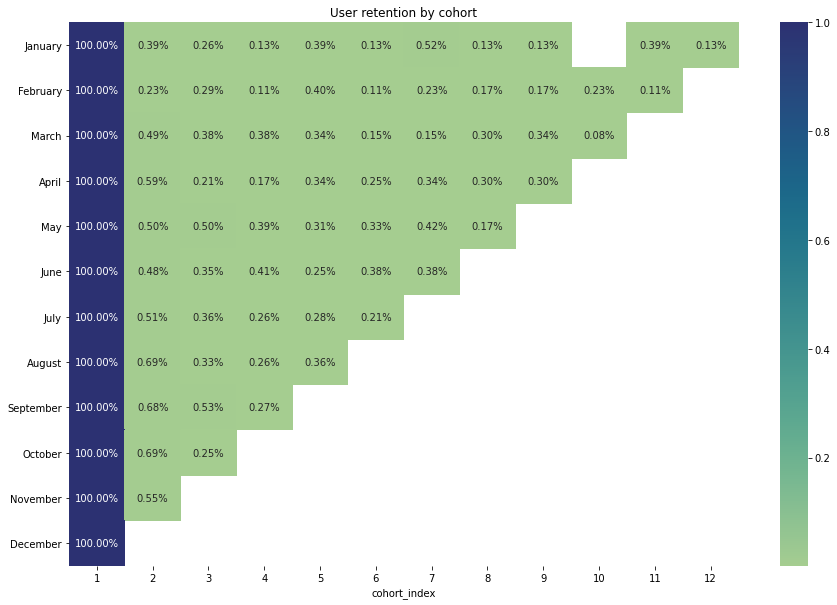

In [415]:
fig, ax = plt.subplots(figsize=(15,10)) 
sns.heatmap(
  task5_table, 
  cmap='crest', 
  annot=True,
  annot_kws={"fontsize":10},
  fmt='.2%',
  ax=ax
  ).set_title("User retention by cohort")
plt.ylabel('')

plt.show()

In [163]:
#На 3й месяц, самым высокий retention rate был в сентябрьской когорте

6. Часто для качественного анализа аудитории используют подходы, основанные на сегментации. 
Используя python, построй RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию. 
В кластеризации можешь выбрать следующие метрики: 
    R - время от последней покупки пользователя до текущей даты, 
    F - суммарное количество покупок у пользователя за всё время, 
    M - сумма покупок за всё время. Подробно опиши, как ты создавал кластеры. 
Для каждого RFM-сегмента построй границы метрик recency, frequency и monetary для интерпретации этих кластеров. 
Пример такого описания: RFM-сегмент 132 (recency=1, frequency=3, monetary=2) имеет границы метрик recency 
    от 130 до 500 дней, frequency от 2 до 5 заказов в неделю, monetary от 1780 до 3560 рублей в неделю. 

In [416]:
task6 = df_1_2_3.copy()

In [417]:
#находим время последнего ордера, его берем за текущее время
task6.order_approved_at.max()

Timestamp('2018-09-03 17:40:06')

In [418]:
#находим дату крайнего ордера каждого пользователя
task6['recency'] = (task6.order_approved_at.max() - task6.groupby('customer_unique_id')['order_approved_at'].transform('max')).dt.days

In [419]:
#находим количество покупок каждого пользователя
task6['frequency'] = task6.groupby('customer_unique_id')['price'].transform('count')

In [420]:
#находим сколько потратил каждый пользователь
task6['monetary'] = task6.groupby('customer_unique_id')['price'].transform('sum')

In [421]:
#создаем новый датафрейм из нужных колонок
rfm = task6[['customer_unique_id', 'recency', 'frequency', 'monetary']]

In [422]:
#удаляем дулбикаты повторяющихся пользователей
rfm = rfm.drop_duplicates('customer_unique_id')

In [423]:
#смотрим какие значения у нас получились
rfm.describe()

,recency,frequency,monetary
count,95997.000000,96096.000000,96096.000000
mean,243.250904,1.172265,141.438184
std,153.282280,0.627071,217.215904
min,0.000000,0.000000,0.000000
25%,119.000000,1.000000,45.990000
50%,224.000000,1.000000,89.000000
75%,353.000000,1.000000,154.000000
max,718.000000,24.000000,13440.000000


In [424]:
#берем квантили 25% и 75% и получаем наши интервалы для 3-х групп 
quintiles = rfm[['recency', 'frequency', 'monetary']].quantile([.25, .75]).to_dict()
quintiles

{'recency': {0.25: 119.0, 0.75: 353.0},
 'frequency': {0.25: 1.0, 0.75: 1.0},
 'monetary': {0.25: 45.99, 0.75: 154.0}}

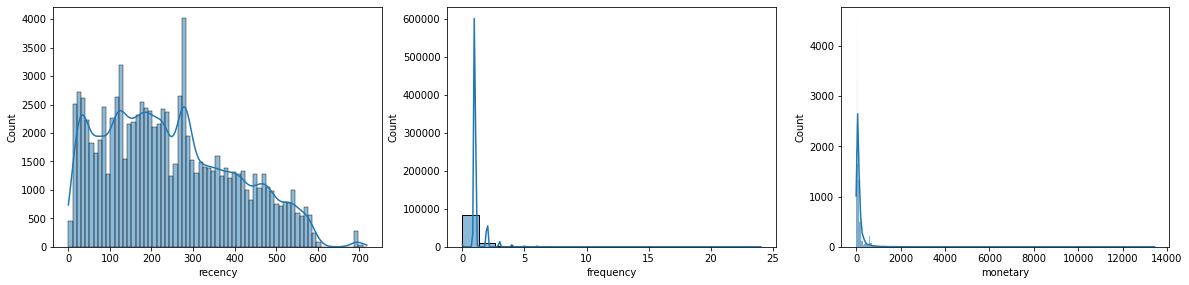

In [442]:
#посмотрим, как распределились наши значения на графиках
plt.figure(figsize=(20, 15))
plt.subplot(3, 3, 1)
sns.histplot(rfm['recency'], kde=True)
plt.subplot(3, 3, 2)
sns.histplot(rfm['frequency'], kde=True)
plt.subplot(3, 3, 3)
sns.histplot(rfm['monetary'], kde=True)

In [443]:
def r_score(x):
    if x <= quintiles['recency'][.25]:
        return 3
    elif x <= quintiles['recency'][.75]:
        return 2
    else:
        return 1

def fm_score(x, c):
    if x <= quintiles[c][.25]:
        return 1
    elif x <= quintiles[c][.75]:
        return 2
    else:
        return 3   

In [444]:
rfm['R'] = rfm['recency'].apply(lambda x: r_score(x))
rfm['F'] = rfm['frequency'].apply(lambda x: fm_score(x, 'frequency'))
rfm['M'] = rfm['monetary'].apply(lambda x: fm_score(x, 'monetary'))

In [445]:
rfm

,customer_unique_id,recency,frequency,monetary,R,F,M
0,861eff4711a542e4b93843c6dd7febb0,475.0,1,124.99,1,1,2
1,290c77bc529b7ac935b93aa66c333dc3,233.0,1,289.00,2,1,3
2,060e732b5b29e8181a18229c7b0b2b5e,106.0,1,139.94,3,1,2
3,259dac757896d24d7702b9acbbff3f3c,174.0,1,149.94,2,1,2
4,345ecd01c38d18a9036ed96c73b8d066,36.0,1,230.00,3,1,3
...,...,...,...,...,...,...,...
113420,1a29b476fee25c95fbafc67c5ac95cf8,149.0,1,74.90,2,1,2
113421,d52a67c98be1cf6a5c84435bd38d095d,152.0,1,114.90,2,1,2
113422,e9f50caf99f032f0bf3c55141f019d99,147.0,1,37.00,2,1,1
113423,73c2643a0a458b49f58cea58833b192e,303.0,1,689.00,2,1,3


In [446]:
rfm['RFM Score'] = rfm['R'].map(str) + rfm['F'].map(str) + rfm['M'].map(str)
rfm.head()

,customer_unique_id,recency,frequency,monetary,R,F,M,RFM Score
0,861eff4711a542e4b93843c6dd7febb0,475.0,1,124.99,1,1,2,112
1,290c77bc529b7ac935b93aa66c333dc3,233.0,1,289.00,2,1,3,213
2,060e732b5b29e8181a18229c7b0b2b5e,106.0,1,139.94,3,1,2,312
3,259dac757896d24d7702b9acbbff3f3c,174.0,1,149.94,2,1,2,212
4,345ecd01c38d18a9036ed96c73b8d066,36.0,1,230.00,3,1,3,313


In [447]:
segt_map = {
    r'31[1-3]': 'Новые',
    r'2[1-3][1-3]': 'спящие',
    r'33[1-2]': 'лояльные',
    r'32[1-2]': 'постоянные',
    r'133': 'уходящие чемпионы',
    r'13[1-2]': 'уходящие постоянные',
    r'323': 'потенциальные чемпионы',
    r'333': 'чемпионы',
    r'111': 'потерянные',
    r'11[2-3]': 'одноразовые'
}

rfm['Segment'] = rfm['RFM Score'].replace(segt_map, regex=True)
rfm.head()

,customer_unique_id,recency,frequency,monetary,R,F,M,RFM Score,Segment
0,861eff4711a542e4b93843c6dd7febb0,475.0,1,124.99,1,1,2,112,одноразовые
1,290c77bc529b7ac935b93aa66c333dc3,233.0,1,289.00,2,1,3,213,спящие
2,060e732b5b29e8181a18229c7b0b2b5e,106.0,1,139.94,3,1,2,312,Новые
3,259dac757896d24d7702b9acbbff3f3c,174.0,1,149.94,2,1,2,212,спящие
4,345ecd01c38d18a9036ed96c73b8d066,36.0,1,230.00,3,1,3,313,Новые


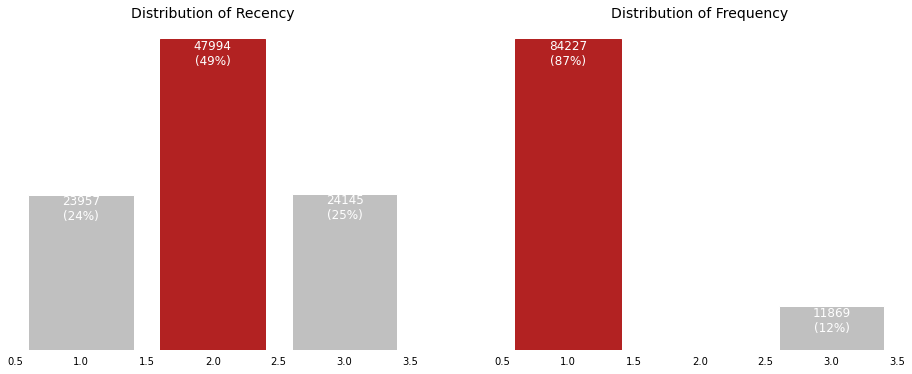

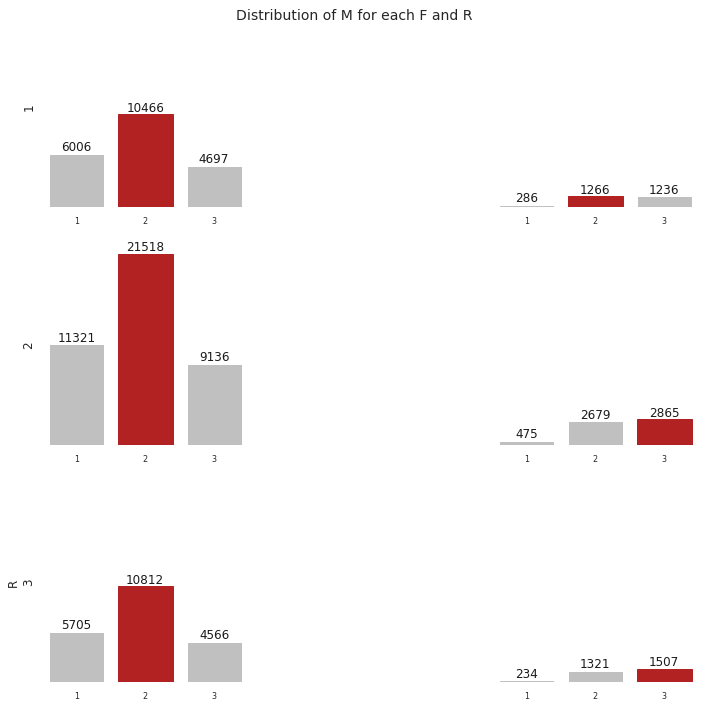

In [448]:
# plot the distribution of customers over R and F
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
sns.set(style="dark")
for i, p in enumerate(['R', 'F']):
    parameters = {'R':'Recency', 'F':'Frequency'}
    y = rfm[p].value_counts().sort_index()
    x = y.index

    ax = axes[i]

    bars = ax.bar(x, y, color='silver')
    ax.set_frame_on(False)
    ax.tick_params(left=False, labelleft=False, bottom=False)
    ax.set_title('Distribution of {}'.format(parameters[p]),
                fontsize=14)
    for bar in bars:
        value = bar.get_height()
        if value == y.max():
            bar.set_color('firebrick')
        ax.text(bar.get_x() + bar.get_width() / 2,
                value - 5,
                '{}\n({}%)'.format(int(value), int(value * 100 / y.sum())),
               ha='center',
               va='top',
               color='w')

plt.show()
# plot the distribution of M for RF score
fig, axes = plt.subplots(nrows=3, ncols=3,
                         sharex=False, sharey=True,
                         figsize=(10, 10))

r_range = range(1, 4)
f_range = range(1, 4)
for r in r_range:
    for f in f_range:

        y = rfm[(rfm['R'] == r) & (rfm['F'] == f)]['M'].value_counts().sort_index()
        x = y.index
        ax = axes[r - 1, f - 1]
        bars = ax.bar(x, y, color='silver')
        if f == 1:
            if r == 3:
                ax.set_ylabel('R\n{}'.format(r))
            else:
                ax.set_ylabel(r)
        ax.set_frame_on(False)
        ax.tick_params(left=False, labelleft=False, bottom=False)
        ax.set_xticks(x)
        ax.set_xticklabels(x, fontsize=8)

        for bar in bars:
            value = bar.get_height()
            if value == y.max():
                bar.set_color('firebrick')
            ax.text(bar.get_x() + bar.get_width() / 2,
                    value,
                    int(value),
                    ha='center',
                    va='bottom',
                    color='k')
fig.suptitle('Distribution of M for each F and R',
             fontsize=14)
plt.tight_layout()
plt.show()

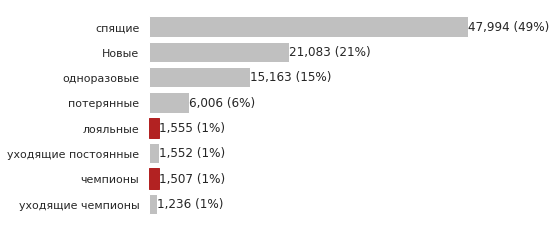

In [449]:
# count the number of customers in each segment
segments_counts = rfm['Segment'].value_counts().sort_values(ascending=True)

fig, ax = plt.subplots()

bars = ax.barh(range(len(segments_counts)),
              segments_counts,
              color='silver')
ax.set_frame_on(False)
ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)
ax.set_yticks(range(len(segments_counts)))
ax.set_yticklabels(segments_counts.index)

for i, bar in enumerate(bars):
        value = bar.get_width()
        if segments_counts.index[i] in ['чемпионы', 'лояльные']:
            bar.set_color('firebrick')
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '{:,} ({:}%)'.format(int(value),
                                   int(value*100/segments_counts.sum())),
                va='center',
                ha='left'
               )

plt.show()